# Chains of circulations

<font size="4">which AG journal(s) initiate(s) chains of circulations within the AG community</font>

## Data Retrieval

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium
import VizKG.visualize as vkg
import plotly.express as px
import markdown as md

In [2]:
endpoint = "http://localhost:3030/VisualContagions/sparql"

In [3]:
q ="""

PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX aat: <http://vocab.getty.edu/aat/>


SELECT DISTINCT ?cluster WHERE {

                ?cluster crm:P148_has_component ?image ;
                         crm:P1_is_identified_by ?identifier .
                ?image crm:P128i_is_carried_by ?issue . 
                ?issue crm:P2_has_type <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> .
      
FILTER NOT EXISTS {

    VALUES ?trash { 
        
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000140031d34e7f32f8fd1bd1734060214c3ad24b96e367e6c7ac7b2af6e527cc8c34e8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000f00f2517854b489d2bdd53b690c5ff830c0c9f1aad4b60a27941f7781267ef1cf6d>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000500e18f2dac9c45156004ab5cb9939ea646d784722ff6c1ffac5bc37ca091252e43>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000005009220cc1b213b05cab3efc43f0e4561a36e216780fd363dc3ead1f01368b33892>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000040077e6a6c83e14343f6f6640aeeda400ff79c66e15558495f38a570229ad9088da>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000004001433a294563676e3499ab3f3877fb7c388dff9a5b91fc17a69d60ea565814536>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300c7466ff7352ae34a7341e0bb573f1537bba5788f9698df593f00176adf8ed978>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300b2355781a9e3f1dbdb79ffa77e67ad7da85ddddc1b790f4aefed59d2e45ee6a7>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030063404a0b0f25c4bc11f2589dcc74b4b1e0989ce265572a46d13a6f91eb6a9f1e>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030039ac3a0cdc635027c14d500278366e1e2d767267aa062f58c359d0841ac6f37d>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300368959fdd010d08813b6d7d34ab791758478818f879759c1f3c6455c1983d25a>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000003002d62f3a250c7310a2440b06f3de7c606651e206c3579454081a24a89d1878351>                         
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300019e9b2c78d92b6f56d6d01b99fc4c722d55e9e9872dda2e634f2b0cdd02cfb8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200e0b8e0d04e36ee62cb79253ae7fcc151fa922fe902ab36885f4abcc47fdcca4e>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000002006b69c25c491d4e7aca5e62f66747d03cb47abb810859c34e66df831c293fa8a8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000020061273c01a5333060afef4bfd7f379cd01afb5eeb849390d3ea85b2479d84a08f>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000002002cb36192f01631ce9d01048c27246acbb60f2fde7d2d4bfdfed1804c31b4bdb9>                         
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000020021801a7508f0295ee7be2a86ea9763bfb0078aef44c89552351caea2aea3a3ea>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000600c6af7d32a5d172ca59bb1997a4ef6e983d60d06f5b3a3755fbc65ae1957ce23c>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000700fb49c1f48487902b4437e16cc2d78b89e3a98f52c8f65c0e4eedd85d80e217b1>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000700fb79995772c00bb4d73d2b5e91c91d7781e7268c7c0b6a2606e4c01cfcf66ac5>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000090015ff635e61946bf01b675ffc6877c07c6e7725f68a3839a2f852f62ec67995dc>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00a7abfe7063f803a5dcd90cc8d54008e7a3e69f07e487a0fd40b1b279bc79eef8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00feca4edc94d98d05c7a13833c7564e324cd20be9051832da916e9d70ae07ad1f>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a0065d77d414af0128714e423067fdd3a73230699c7194f079ace217c302713f314>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000e00aa775ab9acbab969b79714d2d78737b258410af160aec663e8c3e407a849e288>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000180098a1d3bd96c00a6c0f612ed33db5e18664e5e44e29e899c739cb46efb5c9359b>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001800c35c11877c73151184ef51a631b37e6e0f026c72ba48b32e4789422e11c09fbf>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001b00906fbaf5aa338463ada02b2778d69154a89525e13026eadc19cd82862a95cd69>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002200a85e3117d932d5ef5a9c5d178e43a8d6dc07bde665a426d313568bfa5ea3a9f9>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002500745277a76e3c39dfaee431f9ac5c0b4520e1855440cddfdec90e7d5882af5063> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00003c0079fca5aa32f21f894f60a5dd25ba17e720c469af10a6e4b1df453de30fe93e17> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00003d00c899a5073ac5851b4552ef41cddb8a59959cbaff5aede5cbd5aa624f13984e04> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001e002b2b66d8341fe8685ad3b9df6bc17590236bead713432c79bc2914b23e888c73> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000490021648c6fcce403be16b80d654186ffafd7635e4e0906a65516aff956179a61d3> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030040d2720fb2fd94a38df5dc5b0d55e14309962e6c764e23a54a819816cdfe9c20> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000015004c44ed7f0e7150811be78d4b930ef72322476f4d9cadcf1f73b08117bae435a1>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200108e61b49fbe40ca13dfc9dd06bbed1701c979a1ed985482c1ce1de08b17717d>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000003009775be58b129b4f4079112ec1c825552f238d9e580435d2c732066cecf29baa8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000e8009061dc5b29fb17872c9c13ac1a64fe42e8b94af2481e59886f28d0156fde0ceb>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00026200b3d151e5c855c651b2a0bea2c9116be1a5e5b7141bacc846b12d3708338ff615>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000ca00a432dfdd48c6534088f51065c6f2983133e467314d5d6a4560ae5ea16de6f359>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000e8009061dc5b29fb17872c9c13ac1a64fe42e8b94af2481e59886f28d0156fde0ceb>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00008a005e931cc1f1dc0dc0f82d3ee457c5b642600420ae9313b50ad6c0d75b41b8f1c0>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0001bd00a370039869e9e1bb229cd73ddc231b51110e135de82d755ef72e3b367a5411e9>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000109002f020235176a28018a0944ed84b4b7ddbed8737474caaa5c0b54922a4cd6073c>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00024100820c145c252454de492f79784d2c1df4b3a13d9eabf0179f0e0305b516a764ba>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0003ec00036e6aa8355e0f69196bf6006defd506c93e04722b54cf7831c66c3c3b8dbb05>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200f89ef4fb7b639ce5e811ec9ec425c3da3b92dd5edb5d9e64fbf8d010f9d96d71>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000040066b73cf2a0b0742a0aceecc4dd1724b52dc7afbdc4b48432ee3f0336124798aa>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001200bed2a9ade1689744b661b58c1d93bcd442cbeafcf07b6460d0df1b33d65f5b86>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000022005d01a84e38421213b8816fd78e4aef0890445f65f81de2ee1459980a6335942a>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001600fe63944181de71b69fc3900867dc30611de913a214c5d42ac2e7ce3dd7cff99f>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000012009d66187e47b439dd2c2e6668dd9945209f40685c7039c56c563a4aa9bbfa9718>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000d0069b0d3bd802ae948c1f53b96391afeb46fcd505e999cb56cd37406508e4ef418>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000b002057ee6db2a8ea72c04e36379e7b035a4d2911a1155b5652230551866825ab90>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000b0003d9d58d012451307b2ef5fbd75af31eec0c5f1afcdefb10b4ab8fbc38d15615>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00609f4e0b53f5b2ca7afaea13c7a3ba187b05ae3bdd1108598e5226a7aaf18ded>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000008005b033c554cfd743ed238cd05b35f46fe7de56720622971b00aecaf985896fe4a>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000600d4e85eaf39fb676e999b8d2466a4455d48d70791ff2d4dd1cc4653c248264df3>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002a00a60bf43cf1fb052165221ee1727e977b2ecf99f820cbbd426d12c6aa6a37d9e4>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000310098549f748176d2f4efedf76773dca2aafeaf8db5f746daf37a50dd3d0819dbb3>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0003d500d8362a66c04fe8273b00d9470929fd918a6dc6c4395f060e0c5e270f12f54f5c>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0003ff00a6da95a6b61b8c47220d9839b7b4b6afe26daad02ee0c0c291c40ad1bb0bec90>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000c9000f961bd877cdc346bd51b76a74b698924ae6960e3bbfa0986e7aea7da730930c>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000d000ecf8a0329d2530d3eb601e077c0e5c298db100b8316c0af9232e41e8a7e8e4ef>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000403008f37a6852f6339eefe0e74225b20553b5d641b32015b15d40ca4d216a540ae2f>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002400d7b4ea535865b256e1c13f0d6505182ead425183c8f919bfa3309aab1dae43dc>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001f00c18ad27c34a66610ece997934ce4bc1aa5fbcdad562e58a52ab86792352bfb9c>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002b000918272590bc01401e6367c6448a222445fe13cabec0a2a38a7b38e598cea622>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000057008d59ea30b6175a9c5c32ebf3caa2c27cce0d569fd3b2a899ebf0107086c3a197>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000028007bf1c23529418f9fba6de2955caa8fa4e1572632151c41a9f1b20c1c5a45a1c5>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00005a009d47a1932fcbbe7ff04ac3017fa6d167f06fe3287477d6c1cedae50451cd67dc>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001f0087307813ef1d16a6def5d96b8b6550a707da4fd6702aa64d8425b29e6826f049>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001c0000968f38146238bab2f376c40b0fca62e734f151a85e2ecce4981e0050eb57a0>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001d00ffc088f4f254a86d70e0a3495bbf5f288b1373e96c6875d487cd1b14076e2702>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001d000d01d183fa765191f6028c4b69a7e1c9c9ed1d9a3ae14bb9a4731b5172f4b337>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001c002016002f400721bfa0a32f16e887e64cc4e092cd626a7fb7c426545e0757e7f1>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0002910088db3f58b1c573c281f266c695c21d421c9337abca57d4a51440e13a2f9c5893>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00028200ce1d42e579bb46d53b1b038b5f23bf88a8057f5d5cb9806d9c87dee28477ecc4>
} .
                                        
                          ?cluster crm:P1_is_identified_by  ?trash . }
                
    } 

"""

In [4]:
df = sparql_dataframe.get(endpoint, q)

In [5]:
df

,cluster
0,https://lod.unige.ch/vc/cluster/000005002dad81...
1,https://lod.unige.ch/vc/cluster/00000300b38745...
2,https://lod.unige.ch/vc/cluster/000008000c6c9e...
3,https://lod.unige.ch/vc/cluster/0000030031c67e...
4,https://lod.unige.ch/vc/cluster/0000030004db65...
...,...
4772,https://lod.unige.ch/vc/cluster/00000200a8aa86...
4773,https://lod.unige.ch/vc/cluster/00000200da6553...
4774,https://lod.unige.ch/vc/cluster/000002005ebc14...
4775,https://lod.unige.ch/vc/cluster/0000020070846f...


In [6]:
df['cluster'] = '<' + df['cluster'].astype(str)
df['cluster'] = df['cluster'].astype(str) +  '>' 
cluster = df["cluster"].values.tolist()

In [7]:
n_cluster = len(cluster)
print("We retrieved {} clusters with at least one image from an AG journal".format(n_cluster))

We retrieved 4777 clusters with at least one image from an AG journal


<font size="4">The list should be used for another SPARQL query, so a separator between the uri should be added </font>

<font size="4">We use the results obtained in the first query for a second query. Bur first we need to split the list in two</font>

In [8]:
q1 = cluster[:len(cluster)//2]
q2 = cluster[len(cluster)//2:]

In [9]:
separator = ' '
values1 = separator.join(q1)
values2 = separator.join(q2)

In [10]:
q1= """
    PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
    PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
    PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX aat: <http://vocab.getty.edu/aat/>
    
    SELECT DISTINCT ?cluster ?identifier ?image ?issueLabel ?countryLabel ?labelType ?cityLabel ?begin {
    VALUES ?cluster { %s } .
    
    ?cluster crm:P148_has_component ?image ;
           	crm:P1_is_identified_by ?identifier .
            
            ?image crm:P128i_is_carried_by ?issue . 
		
        ?issue crm:P108i_was_produced_by ?production ;
                rdfs:label ?issueLabel ;
                crm:P2_has_type ?typeIssue .
        ?typeIssue rdfs:label ?labelType .
        
        ?production crm:P4_has_time-span ?time ;
                     crm:P7_took_place_at ?country .
                     
        ?time a crm:E52_Time-Span;
                crm:P81a_end_of_the_begin ?begin . 
        
        ?country crm:P2_has_type aat:300387506 ;
                rdfs:label ?countryLabel .
        
        OPTIONAL {
        
        ?production crm:P7_took_place_at ?city .
        ?city crm:P2_has_type aat:300008389 ;
                rdfs:label ?cityLabel .
        }
          
            
    }    
    
""" % values1

In [11]:
df_q1 = sparql_dataframe.get(endpoint, q1)

In [12]:
q2= """
    PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
    PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
    PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX aat: <http://vocab.getty.edu/aat/>
    
    SELECT DISTINCT ?cluster ?identifier ?image ?issueLabel ?countryLabel ?labelType ?cityLabel ?begin {
    VALUES ?cluster { %s } .
    
    ?cluster crm:P148_has_component ?image ;
           	crm:P1_is_identified_by ?identifier .
            
            ?image crm:P128i_is_carried_by ?issue . 
		
        ?issue crm:P108i_was_produced_by ?production ;
                rdfs:label ?issueLabel ;
                crm:P2_has_type ?typeIssue .
        ?typeIssue rdfs:label ?labelType .
        
        ?production crm:P4_has_time-span ?time ;
                     crm:P7_took_place_at ?country .
                     
        ?time a crm:E52_Time-Span;
                crm:P81a_end_of_the_begin ?begin . 
        
        ?country crm:P2_has_type aat:300387506 ;
                rdfs:label ?countryLabel .
        
        OPTIONAL {
        
        ?production crm:P7_took_place_at ?city .
        ?city crm:P2_has_type aat:300008389 ;
                rdfs:label ?cityLabel .
        }
          
            
    }    
    
""" % values2

In [13]:
df_q2 = sparql_dataframe.get(endpoint, q2)

In [14]:
df1 = pd.concat([df_q1, df_q2])

In [15]:
# save the result of the query
df1.to_csv('csv/internal/query_result.csv', index=False)
# if you are using the notebook without SPARQL, if you can charge the CSV as df1 and proceed from this point forward

In [16]:
df1

,cluster,identifier,image,issueLabel,countryLabel,labelType,cityLabel,begin
0,https://lod.unige.ch/vc/cluster/000005002dad81...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8092415;...,Novy LEF,Russia,Avant-garde Journal,Moscow,1927-01-01T00:00:00
1,https://lod.unige.ch/vc/cluster/000005002dad81...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8030160;...,Novy LEF,Russia,Avant-garde Journal,Moscow,1928-01-01T00:00:00
2,https://lod.unige.ch/vc/cluster/000005002dad81...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8029289;...,Novy LEF,Russia,Avant-garde Journal,Moscow,1927-01-01T00:00:00
3,https://lod.unige.ch/vc/cluster/000005002dad81...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8059014;...,Novy LEF,Russia,Avant-garde Journal,Moscow,1927-01-01T00:00:00
4,https://lod.unige.ch/vc/cluster/000005002dad81...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8084481;...,Novy LEF,Russia,Avant-garde Journal,Moscow,1927-01-01T00:00:00
...,...,...,...,...,...,...,...,...
7182,https://lod.unige.ch/vc/cluster/000002005ebc14...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8034541;...,Blok,Poland,Avant-garde Journal,Warsaw,1926-03-01T00:00:00
7183,https://lod.unige.ch/vc/cluster/0000020070846f...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8034541;...,Blok,Poland,Avant-garde Journal,Warsaw,1926-03-01T00:00:00
7184,https://lod.unige.ch/vc/cluster/0000020070846f...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8034541;...,Blok,Poland,Avant-garde Journal,Warsaw,1926-03-01T00:00:00
7185,https://lod.unige.ch/vc/cluster/00000200e1619f...,https://visualcontagions.unige.ch/explore/dupl...,https://iiif.unige.ch/iiif/2/fedora_ug8034541;...,Blok,Poland,Avant-garde Journal,Warsaw,1926-03-01T00:00:00


### Remove clusters with primitive images with the same dates

<font size="4">Some clusters do have primitive images with the same date of publications, opening the problem of uncertainty of circulation, as we are not able to define the primitive image at the origine of a circulation chain. 
A solution to the problem could be to use a randomizer in our analysis, choosing randomly between one or the other. 
However at this stage of our analysis, we prefer to ignore such clusters and proceed to only focus on the one we are certain about where the circulation stem from.</font>

<font size="4">To do so, we first identify the clusters which have more than one earliest date, and we remove them</font>

In [17]:
df1['cluster'].nunique()

4777

In [18]:
df1[df1.groupby('identifier')['begin'].transform('first').eq(df1['begin'])]
df1_count = df1.groupby(['identifier','begin']).size().reset_index(name='count')

In [19]:
df1_count

,identifier,begin,count
0,https://visualcontagions.unige.ch/explore/anal...,1929-01-01T00:00:00,2
1,https://visualcontagions.unige.ch/explore/anal...,1930-05-01T00:00:00,1
2,https://visualcontagions.unige.ch/explore/anal...,1932-01-01T00:00:00,1
3,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,1
4,https://visualcontagions.unige.ch/explore/anal...,1925-07-15T00:00:00,1
...,...,...,...
12487,https://visualcontagions.unige.ch/explore/dupl...,1976-01-01T00:00:00,3
12488,https://visualcontagions.unige.ch/explore/dupl...,1977-01-01T00:00:00,1
12489,https://visualcontagions.unige.ch/explore/dupl...,1987-01-01T00:00:00,3
12490,https://visualcontagions.unige.ch/explore/dupl...,1999-01-01T00:00:00,1


In [20]:
df1_count.sort_values(by=['identifier', 'begin'], ascending=True, inplace=True)
df1_count = df1_count.drop_duplicates(subset='identifier', keep="first")
df1_count.drop(['begin'], axis=1, inplace=True)
df1_count.to_csv('csv/internal/df1_count.csv', index=False)
df1_count.drop(df1_count.loc[df1_count['count']!=1].index, inplace=True)

In [21]:
df2 = pd.merge(df1_count, df1, on=["identifier"], how="outer", indicator=True)
df2 = df2.loc[df2["_merge"] == "both"].drop("_merge", axis=1)
df2.drop(['count'], axis=1, inplace=True)

In [22]:
df2['cluster'].nunique()

3351

In [23]:
df2.to_csv('csv/internal/internal_df2.csv', index=False)

### Escape the loop

<font size="4">In order to avoid computing circulation within the same journal, we eliminate from our analysis the clusters which do comprise only a **single journal** (internal journal circulation).</font>

In [24]:
melted_new = df2.groupby('identifier').issueLabel.nunique() > 1
b = melted_new.index[melted_new == True]
melted_only_unique = df2[df2['identifier'].isin(b)]

In [25]:
melted_only_unique["cluster"].nunique() 

1780

In [26]:
melted_only_unique

,identifier,cluster,image,issueLabel,countryLabel,labelType,cityLabel,begin
0,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1932-01-01T00:00:00
1,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,L'Amour de l'art (1920),France,Modern Art Journal,Paris,1933-01-01T00:00:00
2,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1927-01-01T00:00:00
3,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://digi.ub.uni-heidelberg.de/iiif/2/rhs19...,Rocznik Historii Sztuki,Poland,Art History,Warsaw,1965-01-01T00:00:00
4,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://digi.ub.uni-heidelberg.de/iiif/2/rhs19...,Rocznik Historii Sztuki,Poland,Art History,Warsaw,1965-01-01T00:00:00
...,...,...,...,...,...,...,...,...
10620,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Le Monde illustré (1857),France,"Culture, Leisure",Paris,1911-07-01T00:00:00
10621,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://iiif.unige.ch/iiif/2/fedora_ug8072597;...,Blok,Poland,Avant-garde Journal,Warsaw,1924-12-01T00:00:00
10622,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k65...,La Revue aérienne,France,Aviation,Paris,1909-12-10T00:00:00
10623,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k65...,La Revue aérienne,France,Aviation,Paris,1913-12-25T00:00:00


### Add time gaps

In [27]:
melted_only_unique['begin'] = pd.to_datetime(melted_only_unique['begin'])
melted_only_unique.sort_values(by=['identifier', 'begin'], ascending=True, inplace=True)

In [28]:
s = pd.to_datetime(melted_only_unique['begin']).dt.date
melted_only_unique['diff'] = (s - s.groupby(melted_only_unique.identifier).transform('min')).dt.days

In [29]:
melted_only_unique

,identifier,cluster,image,issueLabel,countryLabel,labelType,cityLabel,begin,diff
5,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k15...,La Révolution surréaliste,France,Avant-garde Journal,Paris,1925-07-15,0
8,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://iiif.archivelab.org/iiif/sim_arts-maga...,Arts Magazine,United States of America,Art Journal,New York City,1926-01-01,170
2,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1927-01-01,535
9,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1931-01-01,1996
0,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/12,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1932-01-01,2361
...,...,...,...,...,...,...,...,...,...
10609,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k30...,L'Art vivant (Paris. 1925),France,Modern Art Journal,Paris,1939-02-01,14275
10559,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://iiif.unige.ch/iiif/2/fedora_ug27812300...,Art Directors Annual of Advertising Arts,United States of America,Illustrated Magazine,New York City,1946-01-01,16801
10481,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://iiif.unige.ch/iiif/2/fedora_ug27816408...,Revue der Reclame,Netherlands,Illustrated Magazine,Amsterdam,1962-05-01,22765
10516,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00009500fb7c7c...,https://iiif.unige.ch/iiif/2/fedora_ug27815840...,Revue der Reclame Expres,Netherlands,Illustrated Magazine,Amsterdam,1963-05-01,23130


In [30]:
melted_only_unique.to_csv('csv/internal/melted_only_unique.csv', index=False)

## Analysis of Internal Circulation of AG journals

### Only cluster with AG journals

<font size="4">Let's focus on AG journals only. In here we check the chains of circulations which exist only within the AG community.</font>

<br>

<font size="4">To do so, we find the clusters associated with a unique community, therefore the clusters which have only a single **Journal Type** associated with them</font>

In [31]:
uniType = melted_only_unique.groupby('identifier').labelType.nunique().eq(1)
c = uniType.index[uniType == True]
melted_type = melted_only_unique[melted_only_unique['identifier'].isin(c)]

<font size="4">We filter for only AG journals</font>

In [32]:
melted_type_ag = melted_type.query("labelType == 'Avant-garde Journal'")

In [33]:
melted_type_ag.to_csv('csv/internal/melted_type_ag.csv', index=False)

In [34]:
melted_type_ag['identifier'].nunique()

290

In [35]:
melted_type_count = melted_type_ag
melted_type_count['count_images'] = melted_type_count.groupby(['identifier'])['cluster'].transform('count')

<font size="4">We now have the list of images from cluster containing only AG journals</font>

### Selecting the earliest images

<font size="4">For each cluster we select only the image that start the chain of circulation (the earliest published image per cluster)</font>

In [36]:
internal_ag = melted_type_count.groupby('identifier', group_keys=False).apply(lambda g: g[g['begin'].eq(g['begin'].min())].sample(n=1))

In [37]:
internal_ag['journal_count'] = internal_ag.groupby(['issueLabel'])['identifier'].transform('count')
internal_ag.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [38]:
internal_ag

,identifier,cluster,image,issueLabel,countryLabel,labelType,cityLabel,begin,diff,count_images,journal_count
1008,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002000f9044...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1926-01-01,0,2,76
3004,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002007b2d52...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1945-01-01,0,2,76
1464,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020029568a...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1945-01-01,0,2,76
2955,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020077ee44...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1926-01-01,0,2,76
1388,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020024e8b2...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1928-01-01,0,2,76
...,...,...,...,...,...,...,...,...,...,...,...
3615,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002009c26e5...,https://bluemountain.princeton.edu/bluemtn/iii...,Broom: An International Magazine of the Arts,United States of America,Avant-garde Journal,New York City,1922-01-11,0,2,1
2148,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002004c7000...,https://iiif.unige.ch/iiif/2/fedora_ug8030393;...,Der Dada,Germany,Avant-garde Journal,Berlin,1920-04-01,0,2,1
1977,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/00000200442a6c...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k89...,Montjoie ! Organe de l'impérialsime artistique...,France,Avant-garde Journal,Paris,1914-03-01,0,2,1
7482,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000050073af09...,https://iiif.unige.ch/iiif/2/fedora_ug8087287;...,Formisci,Poland,Avant-garde Journal,Kraków,1921-06-01,0,5,1


In [39]:
internal_ag = internal_ag.drop_duplicates(subset='image', keep="first")
internal_ag.to_csv('csv/internal/internal_ag.csv', index=False)

In [40]:
internal_ag.rename({ 'countryLabel': 'Country'}, axis=1, inplace=True)

In [41]:
first_internal_ag = internal_ag[internal_ag['journal_count'] >= 7]

### Impact

<font size="4">how many chains of circulation a journal starts</font>

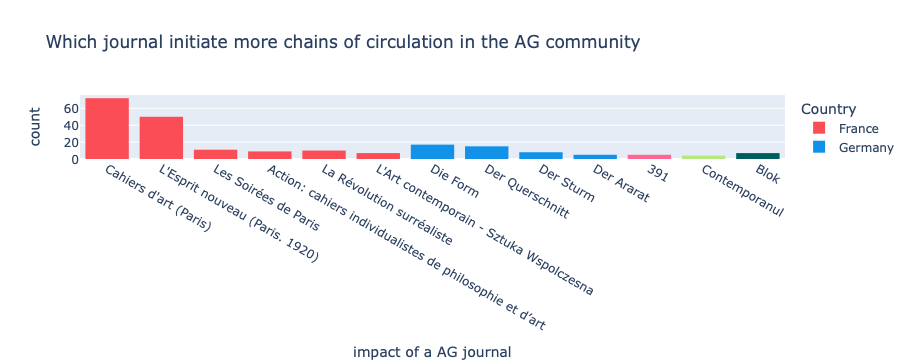

In [113]:
fig = px.histogram(first_internal_ag,  x='issueLabel', color="Country",
            title="Which journal initiate more chains of circulation in the AG community",
                  labels={
                     "issueLabel": "impact of a AG journal"},
                    color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038"   })
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/internal/internal_only_all.png",  scale=10, width=1500, height=800) 
fig.write_html('viz/internal/internal_only_all.html', auto_open=False)

### Time Dynamics

<font size="4">Let's filter for only AG joornals. The data should be analysed in temporal slices, in order to understand the dynamicity of the circulation. We will look particular at this periods:</font>

- 1890-1905
- 1905-1914
- 1914-1918
- 1918-1930
- 1930-1940

</font>

In [43]:
internal_ag['year'] = pd.DatetimeIndex(internal_ag['begin']).year

In [44]:
internal1905 = (internal_ag['year'] >= 1890) & (internal_ag['year'] <= 1909)
internal1910 = (internal_ag['year'] >= 1905) & (internal_ag['year'] <= 1909)
internal1914 = (internal_ag['year'] >= 1910) & (internal_ag['year'] <= 1914)
internal1919 = (internal_ag['year'] >= 1915) & (internal_ag['year'] <= 1919)
internal1926 = (internal_ag['year'] >= 1920) & (internal_ag['year'] <= 1926)
internal1932 = (internal_ag['year'] >= 1927) & (internal_ag['year'] <= 1932)
internal1945 = (internal_ag['year'] >= 1933) & (internal_ag['year'] <= 1945)

internal1914x = (internal_ag['year'] >= 1905) & (internal_ag['year'] <= 1914)

In [45]:
i_ag1905 = internal_ag.loc[internal1905]
i_ag1910 = internal_ag.loc[internal1910]
i_ag1914 = internal_ag.loc[internal1914]
i_ag1919 = internal_ag.loc[internal1919]
i_ag1926 = internal_ag.loc[internal1926]
i_ag1932 = internal_ag.loc[internal1932]
i_ag1945 = internal_ag.loc[internal1945]

i_ag14x = internal_ag.loc[internal1914x]


#### 1905 - 1909

#### 1910 - 1914

In [48]:
i_ag1914['journal_count'] = i_ag1914.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1914.sort_values(by=['journal_count'], ascending=False, inplace=True)

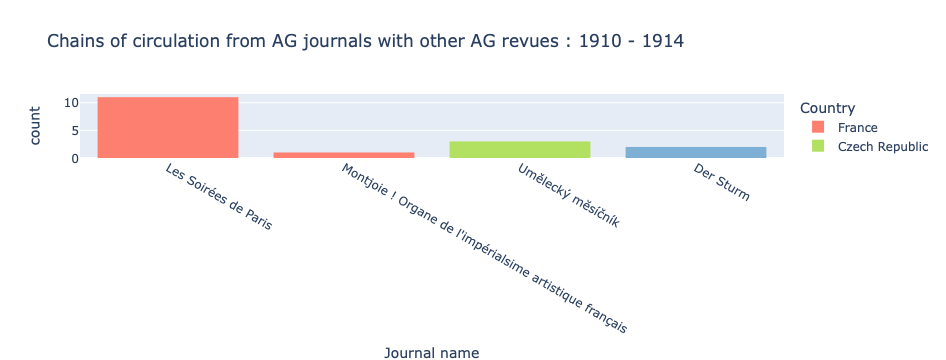

In [116]:
fig = px.histogram(i_ag1914, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1910 - 1914", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"},
                  color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("viz/internal/internal_1910_1914.png", scale=7) 
fig.write_html('viz/internal/internal_1910_1914.html', auto_open=False)

#### 1915 - 1919

In [50]:
i_ag1919['journal_count'] = i_ag1919.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1919.sort_values(by=['journal_count'], ascending=False, inplace=True)

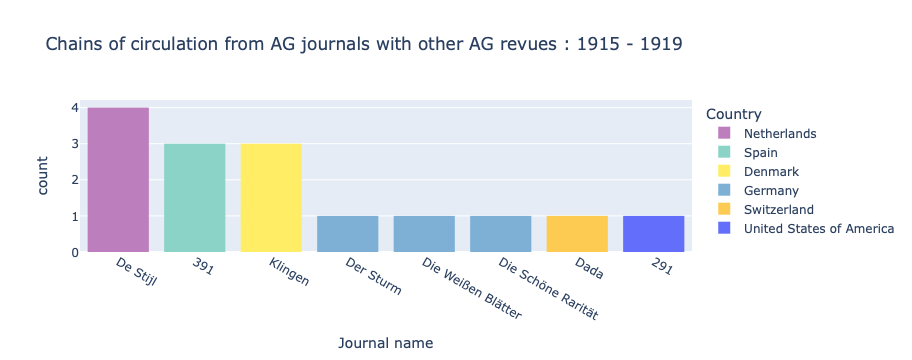

In [117]:
fig = px.histogram(i_ag1919, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1915 - 1919", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"},
                  color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("viz/internal/internal_1915_1919.png", scale=7) 
fig.write_html('viz/internal/internal_1915_1919.html', auto_open=False)

#### 1920 - 1926

In [52]:
i_ag1926['journal_count'] = i_ag1926.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1926.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [103]:
i_ag1926_top = i_ag1926[i_ag1926['journal_count'] >= 3]

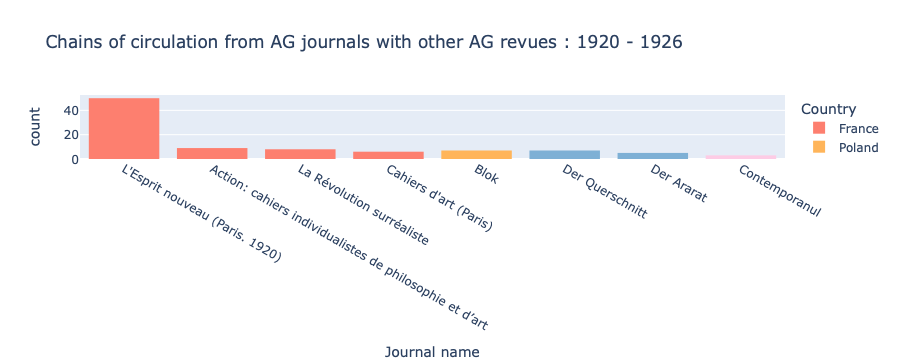

In [118]:
fig = px.histogram(i_ag1926_top, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1920 - 1926", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"},
                  color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("viz/internal/internal_1920_1926.png", scale=7) 
fig.show()
fig.write_html('viz/internal/internal_1920_1926.html', auto_open=False)

#### 1927 - 1932

In [54]:
i_ag1932['journal_count'] = i_ag1932.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1932.sort_values(by=['journal_count'], ascending=False, inplace=True)

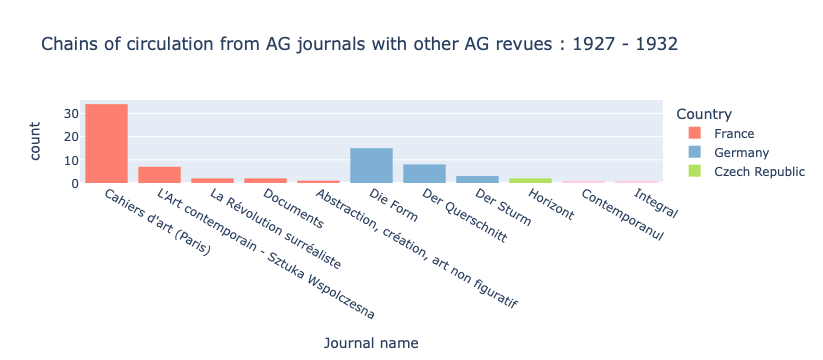

In [119]:
fig = px.histogram(i_ag1932, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1927 - 1932", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"},
                  color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("viz/internal/internal_1927_1932.png", scale=7) 
fig.write_html('viz/internal/internal_1927_1932.html', auto_open=False)

#### 1933 - 1945

In [56]:
i_ag1945['journal_count'] = i_ag1945.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1945.sort_values(by=['journal_count'], ascending=False, inplace=True)

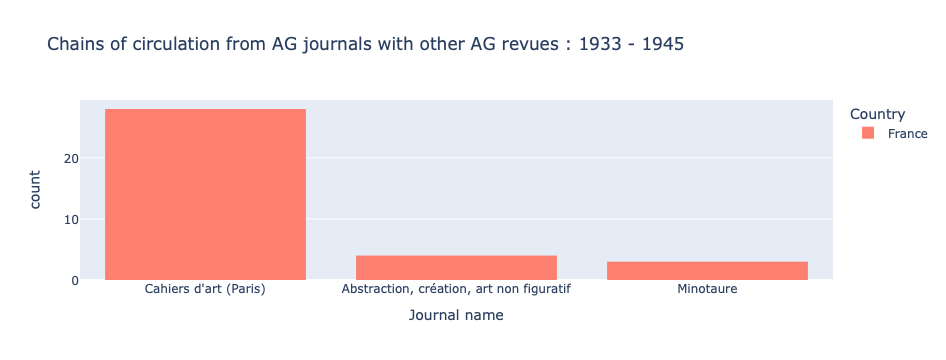

In [120]:
fig = px.histogram(i_ag1945, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1933 - 1945", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"},
                  color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("viz/internal/internal_1933_1945.png", scale=7) 
fig.show()
fig.write_html('viz/internal/internal_1933_1945.html', auto_open=False)

## Primitive images

In [58]:
image_vis = internal_ag.drop_duplicates(subset='image', keep="first")

In [59]:
image_vis['year'] = pd.DatetimeIndex(image_vis['begin']).year

In [60]:
image_vis['image_per_year'] = image_vis.groupby(['year'])['image'].transform('count')
image_vis.sort_values(by=['year'], ascending=True, inplace=True)

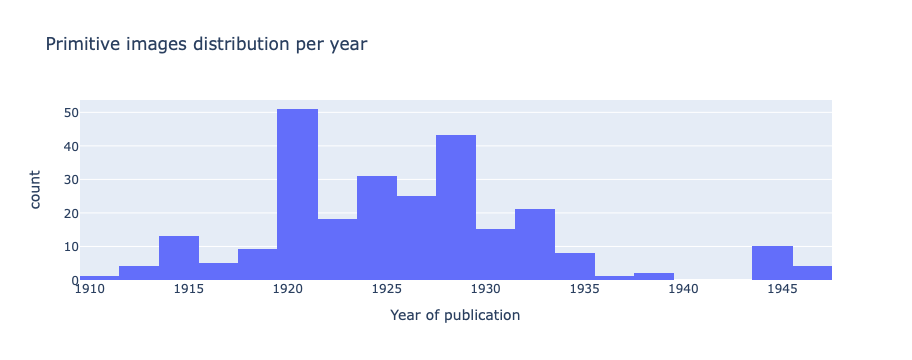

In [61]:
fig = px.histogram(image_vis, x='year',
            title="Primitive images distribution per year",
                  labels={
                     "year": "Year of publication"},
                  )
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_html('viz/internal/image_per_year.html', auto_open=True)
fig.write_image("viz/internal/image_per_year.png", , scale=7) 

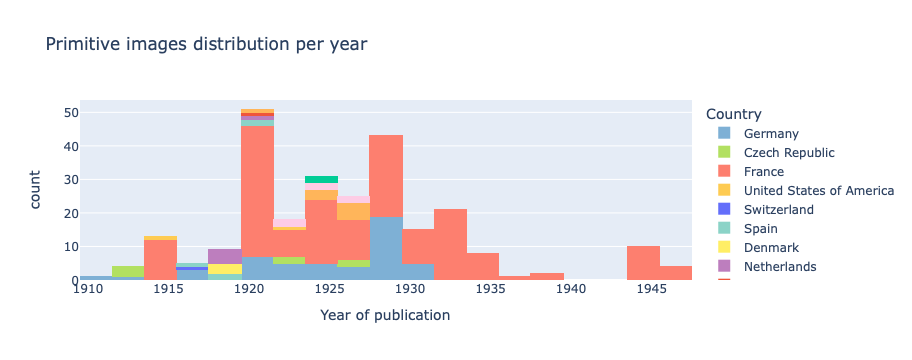

In [115]:
fig = px.histogram(image_vis, x='year', color="Country",
            title="Primitive images distribution per year",
                  labels={
                     "image_per_year": "Images per year",
                     "year": "Year of publication"},
                  color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_html('viz/internal/image_per_year_country.html', auto_open=False)
fig.write_image("viz/internal/image_per_year_country.png", scale=7, width=1300)

## Analysing the chain

In [63]:
internal_ag.head()

,identifier,cluster,image,issueLabel,Country,labelType,cityLabel,begin,diff,count_images,journal_count,year
1008,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002000f9044...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1926-01-01,0,2,76,1926
3004,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002007b2d52...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1945-01-01,0,2,76,1945
1464,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020029568a...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1945-01-01,0,2,76,1945
2955,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020077ee44...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1926-01-01,0,2,76,1926
1388,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020024e8b2...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1928-01-01,0,2,76,1928


In [64]:
internal_ag["primitive"] = "primitive"

In [65]:
internal_ag.drop(['issueLabel','cityLabel','Country','begin', 'journal_count','labelType','count_images','diff'], axis=1, inplace=True)

In [66]:
internal_ag.head()

,identifier,cluster,image,year,primitive
1008,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002000f9044...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1926,primitive
3004,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/000002007b2d52...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,1945,primitive
1464,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020029568a...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,1945,primitive
2955,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020077ee44...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1926,primitive
1388,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000020024e8b2...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1928,primitive


In [67]:
products_dict = dict(zip(internal_ag.image,internal_ag.primitive))
melted_type_ag['primitive'] = melted_type_ag['image'].map(products_dict)

In [68]:
melted_type_ag['primitive'] = melted_type_ag['primitive'].fillna('no')

In [69]:
melted_type_ag.to_csv('csv/internal/df_primitives.csv', index=False)

In [70]:
melted_type_ag

,identifier,cluster,image,issueLabel,countryLabel,labelType,cityLabel,begin,diff,count_images,primitive
456,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/385,https://iiif.unige.ch/iiif/2/fedora_ug8092784;...,Der Ararat,Germany,Avant-garde Journal,Munich,1921-01-01,0,3,primitive
457,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/385,https://iiif.unige.ch/iiif/2/fedora_ug8061898;...,Merz,Germany,Avant-garde Journal,Hanover,1924-07-01,1277,3,no
455,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/385,https://iiif.unige.ch/iiif/2/fedora_ug8072597;...,Blok,Poland,Avant-garde Journal,Warsaw,1924-12-01,1430,3,no
506,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/424,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1926-01-01,0,3,primitive
505,https://visualcontagions.unige.ch/explore/anal...,https://lod.unige.ch/vc/cluster/human/424,https://iiif.unige.ch/iiif/2/fedora_ug8090347;...,Praesens,Poland,Avant-garde Journal,Warsaw,1926-06-01,151,3,no
...,...,...,...,...,...,...,...,...,...,...,...
7587,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://bluemountain.princeton.edu/bluemtn/iii...,Action: cahiers individualistes de philosophie...,France,Avant-garde Journal,Paris,1921-01-05,0,5,primitive
7588,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://images.iiif.slub-dresden.de/iiif/2/dat...,Der Querschnitt,Germany,Avant-garde Journal,Düsseldorf,1926-02-01,1853,5,no
7590,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1930-01-01,3283,5,no
7589,https://visualcontagions.unige.ch/explore/dupl...,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1931-01-01,3648,5,no


In [71]:
melted_type_ag.drop(['count_images','diff'], axis=1, inplace=True)

In [72]:
melted = melted_type_ag.melt(id_vars=["cluster", "identifier", "image", "begin", "issueLabel", "labelType", "cityLabel","countryLabel"], value_name ="start")

In [73]:
melted.sort_values(by=['identifier', 'begin'], inplace=True)

In [74]:
melted.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,variable,start
0,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8092784;...,1921-01-01,Der Ararat,Avant-garde Journal,Munich,Germany,primitive,primitive
1,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8061898;...,1924-07-01,Merz,Avant-garde Journal,Hanover,Germany,primitive,no
2,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8072597;...,1924-12-01,Blok,Avant-garde Journal,Warsaw,Poland,primitive,no
3,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1926-01-01,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,primitive,primitive
4,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8090347;...,1926-06-01,Praesens,Avant-garde Journal,Warsaw,Poland,primitive,no


In [75]:
melted.to_csv('csv/internal/melted_primitive.csv', index=False)

here we re-remove the 

In [76]:
uniType = melted.groupby('identifier').start.nunique().eq(1)
c = uniType.index[uniType == False]
h = uniType.index[uniType == True]

ag_cluster = melted[melted['identifier'].isin(c)]

In [77]:
len(h)

0

In [78]:
ag_cluster.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,variable,start
0,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8092784;...,1921-01-01,Der Ararat,Avant-garde Journal,Munich,Germany,primitive,primitive
1,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8061898;...,1924-07-01,Merz,Avant-garde Journal,Hanover,Germany,primitive,no
2,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8072597;...,1924-12-01,Blok,Avant-garde Journal,Warsaw,Poland,primitive,no
3,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1926-01-01,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,primitive,primitive
4,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8090347;...,1926-06-01,Praesens,Avant-garde Journal,Warsaw,Poland,primitive,no


In [79]:
ag_cluster.to_csv('csv/internal/ag_cluster.csv', index=False)

## Fixing the differences in numbers

<font size="4">Due to the use of both human-made and machine-made clusters, some images may be the same across two clusters (and two chains of circulation). Therefore, while merging the data together, some images are assigned the status of primitive, without being so (they do not start a chain of circulation). We need to remove them before proceeding in our analysis</font>

In [80]:
clusters_after = ag_cluster["identifier"].tolist()
clusters_before = internal_ag["identifier"].tolist()

In [81]:
list_delete = list(set(clusters_after) - set(clusters_before))
list_delete

['https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200ae8eca9317211bf5f7ff199fcb61f35498aa5f7e016cefd4c430cfb0037e6291',
 'https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030098500072d1250388c83302ceca86aa5ecd71a47e4087653f227d9b9e7d7b33b5',
 'https://visualcontagions.unige.ch/explore/analysis/imageseries/430',
 'https://visualcontagions.unige.ch/explore/analysis/imageseries/492',
 'https://visualcontagions.unige.ch/explore/duplicates/clusters/000002000ed648b4817e82a764614aa9a91d04e565b074fbcc0e2dd7c9e8e5a76e998902',
 'https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200bce9c797b03bfba7ff0d9f8d54d4d6a1faf17e87eef3b2b9a65789c66756c519',
 'https://visualcontagions.unige.ch/explore/duplicates/clusters/000002009147327d66e5f329ef0bb8615544ac071ac453e018132d131fdfcffec285c519',
 'https://visualcontagions.unige.ch/explore/analysis/imageseries/440',
 'https://visualcontagions.unige.ch/explore/analysis/imageseries/500',
 'https://visualconta

In [82]:
ag_cluster.loc[ag_cluster['identifier'].isin(list_delete), 'start'] = 'no'
ag_cluster.to_csv('csv/external/ag_cluster.csv', index=False)

In [83]:
ag_uni = ag_cluster.groupby('identifier').start.nunique().eq(1)
c = ag_uni.index[ag_uni == False]
ag_clean = ag_cluster[ag_cluster['identifier'].isin(c)]
ag_clean.to_csv('csv/external/ag_clean.csv', index=False)

In [84]:
ag_clean.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,variable,start
3,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1926-01-01,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,primitive,primitive
4,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8090347;...,1926-06-01,Praesens,Avant-garde Journal,Warsaw,Poland,primitive,no
5,https://lod.unige.ch/vc/cluster/human/424,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1930-01-01,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,primitive,no
15,https://lod.unige.ch/vc/cluster/human/454,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1932-01-01,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,primitive,primitive
16,https://lod.unige.ch/vc/cluster/human/454,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1936-01-01,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,primitive,no


#### Number of images per cluster

In [85]:
ag_clean['image_per_cluster'] = ag_clean.groupby(['identifier'])['cluster'].transform('count')
ag_clean.sort_values(by=['image_per_cluster'], ascending=False, inplace=True)
ag_clean.to_csv('csv/internal/ag_clean.csv', index=False)

<font size="4">Which clusters has the longer chain of circulation?</font>

In [86]:
ag_clean2 = ag_clean.loc[ag_clean['image_per_cluster'].idxmax()]
print(ag_clean2["identifier"])

https://visualcontagions.unige.ch/explore/analysis/imageseries/505


## Visualise interconnections

<font size="4">What are the cluster interconnections? How do the chains of circulation traverse different communities? To discover it, we do a bit of data wrangling, and create two columnsm, one for AG journals which initiate chains of circulation, and another for all the different journals they touch</font>

In [87]:
ag_clean.sort_values(by=['identifier', 'start'], ascending=False, inplace=True)

In [88]:
viz_ag = ag_clean

In [89]:
viz_ag['circulationCountry'] = viz_ag['countryLabel']
viz_ag['circulationIssue'] = viz_ag['issueLabel']

In [90]:
viz_ag['countryLabel'] = viz_ag['countryLabel'][viz_ag['start']=='primitive']
viz_ag['issueLabel'] = viz_ag['issueLabel'][viz_ag['start']=='primitive']

In [91]:
viz_ag.ffill(inplace=True)

In [92]:
viz_ag = viz_ag[viz_ag['start']=='no']

In [93]:
viz_ag.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,variable,start,image_per_cluster,circulationCountry,circulationIssue
658,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://visualcontagions.unige.ch/explore/dupl...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,1931-01-01,Action: cahiers individualistes de philosophie...,Avant-garde Journal,Paris,France,primitive,no,5,France,Cahiers d'art (Paris)
657,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://visualcontagions.unige.ch/explore/dupl...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,1931-01-01,Action: cahiers individualistes de philosophie...,Avant-garde Journal,Paris,France,primitive,no,5,France,Cahiers d'art (Paris)
656,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://visualcontagions.unige.ch/explore/dupl...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1930-01-01,Action: cahiers individualistes de philosophie...,Avant-garde Journal,Paris,France,primitive,no,5,France,Cahiers d'art (Paris)
655,https://lod.unige.ch/vc/cluster/0000050099bb70...,https://visualcontagions.unige.ch/explore/dupl...,https://images.iiif.slub-dresden.de/iiif/2/dat...,1926-02-01,Action: cahiers individualistes de philosophie...,Avant-garde Journal,Düsseldorf,France,primitive,no,5,Germany,Der Querschnitt
651,https://lod.unige.ch/vc/cluster/0000050073af09...,https://visualcontagions.unige.ch/explore/dupl...,https://bluemountain.princeton.edu/bluemtn/iii...,1922-01-08,Formisci,Avant-garde Journal,New York City,Poland,primitive,no,5,United States of America,Broom: An International Magazine of the Arts


In [94]:
viz_ag.sort_values(by=['identifier'], ascending=False, inplace=True)
viz_ag.to_csv('csv/internal/viz_ag.csv', index=False)

In [106]:
viz_ag['year'] = pd.DatetimeIndex(viz_ag['begin']).year

In [107]:
viz_ag_20 = (viz_ag['year'] >= 1920) & (viz_ag['year'] <= 1930)
viz_ag_20_30 = viz_ag.loc[viz_ag_20]

In [108]:
fig1 = px.sunburst(viz_ag_20_30, path=['countryLabel', 'circulationCountry'], color="countryLabel",
                    color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig1.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig.write_image("viz/internal/country_sunburst.png") 
fig1.write_html('viz/internal/country_sunburst.html', auto_open=True)

In [96]:
viz_ag2 = viz_ag.query("issueLabel != circulationIssue")

In [97]:
fig1 = px.sunburst(viz_ag2, path=['issueLabel', 'circulationIssue'], color="countryLabel",
                    color_discrete_map= {
                    "France": "#fd7f6f",
                    "Germany": "#7eb0d5",
                    "Czech Republic": "#b2e061",
                    "Netherlands": "#bd7ebe",
                    "Poland": "#ffb55a",
                    "Denmark" : "#ffee65",
                    "United states of America": "#beb9db",
                    "Romania":"#fdcce5",
                   "Spain": "#8bd3c7"})
fig1.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig1.write_html('viz/internal/issue_sunburst.html', auto_open=True)